# Churn Modeling

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

### **Install Pycaret**

In [1]:
!pip install pycaret


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [6]:
!pip install joblib==1.3

  Obtaining dependency information for joblib==1.3 from https://files.pythonhosted.org/packages/1e/f2/6ec7eb9e48c88c750da04050a5ba8250ca9949dfcf6e624ccee12d2fc653/joblib-1.3.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.9/301.9 kB 874.5 kB/s eta 0:00:0000:010:01m
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.0
    Uninstalling joblib-1.4.0:
      Successfully uninstalled joblib-1.4.0

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


### **Importing the libraries**

In [2]:
#ImportLib
import warnings
warnings.filterwarnings('ignore')
from pycaret.classification import *
import pandas as pd

### **Load and Prepare Data**

In [3]:
data = pd.read_csv("Churn.csv")
data.head(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
#Drop the unwanted columns
data.drop(['RowNumber','CustomerId','Surname'], axis=1 ,inplace = True)

In [6]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### **Setup Auto-ML Model**

In [8]:
classification = setup(data= data, target='Exited',
                             remove_outliers=True,
                             normalize=True,
                             normalize_method='robust',
                             )

,Description,Value
0,Session id,2475
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 11)"
4,Transformed data shape,"(9650, 13)"
5,Transformed train set shape,"(6650, 13)"
6,Transformed test set shape,"(3000, 13)"
7,Numeric features,8
8,Categorical features,2
9,Preprocess,True


### **Compare All Auto-ML Models**

In [9]:
compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8611,0.0000,0.4495,0.7739,0.5670,0.4916,0.5181,0.6530
catboost,CatBoost Classifier,0.8611,0.0000,0.4768,0.7517,0.5813,0.5035,0.5233,1.9970
gbc,Gradient Boosting Classifier,0.8587,0.0000,0.4488,0.7605,0.5624,0.4852,0.5101,0.6900
lightgbm,Light Gradient Boosting Machine,0.8560,0.0000,0.4691,0.7285,0.5696,0.4881,0.5058,1.6160
et,Extra Trees Classifier,0.8529,0.0000,0.4186,0.7494,0.5351,0.4564,0.4846,0.5700
ada,Ada Boost Classifier,0.8501,0.0000,0.4361,0.7159,0.5415,0.4585,0.4788,0.3650
xgboost,Extreme Gradient Boosting,0.8491,0.0000,0.4704,0.6897,0.5571,0.4707,0.4842,0.3080
knn,K Neighbors Classifier,0.8309,0.0000,0.3646,0.6513,0.4661,0.3755,0.3983,0.3550
nb,Naive Bayes,0.8113,0.0000,0.3640,0.5573,0.4392,0.3320,0.3434,0.1990
lr,Logistic Regression,0.8080,0.0000,0.1984,0.5859,0.2955,0.2149,0.2577,1.1060


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=2475, verbose=0,
                       warm_start=False)

### **Top-3** **AutoML** **Models**

In [10]:
top_3 =compare_models(n_select=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:25:48
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8611,0.0000,0.4495,0.7739,0.5670,0.4916,0.5181,0.7490
catboost,CatBoost Classifier,0.8611,0.0000,0.4768,0.7517,0.5813,0.5035,0.5233,2.2710
gbc,Gradient Boosting Classifier,0.8587,0.0000,0.4488,0.7605,0.5624,0.4852,0.5101,0.6560
lightgbm,Light Gradient Boosting Machine,0.8560,0.0000,0.4691,0.7285,0.5696,0.4881,0.5058,1.6070
et,Extra Trees Classifier,0.8529,0.0000,0.4186,0.7494,0.5351,0.4564,0.4846,0.5240
ada,Ada Boost Classifier,0.8501,0.0000,0.4361,0.7159,0.5415,0.4585,0.4788,0.4000
xgboost,Extreme Gradient Boosting,0.8491,0.0000,0.4704,0.6897,0.5571,0.4707,0.4842,0.3270
knn,K Neighbors Classifier,0.8309,0.0000,0.3646,0.6513,0.4661,0.3755,0.3983,0.2130
nb,Naive Bayes,0.8113,0.0000,0.3640,0.5573,0.4392,0.3320,0.3434,0.1750
lr,Logistic Regression,0.8080,0.0000,0.1984,0.5859,0.2955,0.2149,0.2577,0.2280


### **Create Best Model**

In [11]:
best_model =compare_models(n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8611,0.0000,0.4495,0.7739,0.5670,0.4916,0.5181,0.6030
catboost,CatBoost Classifier,0.8611,0.0000,0.4768,0.7517,0.5813,0.5035,0.5233,1.8050
gbc,Gradient Boosting Classifier,0.8587,0.0000,0.4488,0.7605,0.5624,0.4852,0.5101,0.6570
lightgbm,Light Gradient Boosting Machine,0.8560,0.0000,0.4691,0.7285,0.5696,0.4881,0.5058,1.4410
et,Extra Trees Classifier,0.8529,0.0000,0.4186,0.7494,0.5351,0.4564,0.4846,0.5650
ada,Ada Boost Classifier,0.8501,0.0000,0.4361,0.7159,0.5415,0.4585,0.4788,0.3600
xgboost,Extreme Gradient Boosting,0.8491,0.0000,0.4704,0.6897,0.5571,0.4707,0.4842,0.2970
knn,K Neighbors Classifier,0.8309,0.0000,0.3646,0.6513,0.4661,0.3755,0.3983,0.2500
nb,Naive Bayes,0.8113,0.0000,0.3640,0.5573,0.4392,0.3320,0.3434,0.2300
lr,Logistic Regression,0.8080,0.0000,0.1984,0.5859,0.2955,0.2149,0.2577,0.2340


In [12]:
top_3

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_score=False, random_state=2475, verbose=0,
                        warm_start=False),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
   

In [13]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=2475, verbose=0,
                       warm_start=False)

### **Accuracy Score Top-3 Models**


| Model | Accuracy Score | 
| --- | --- | 
| Gradient Boosting Classifier | 0.8586  |
|LLGBM Classifier | 0.8633 |
| Random Forest Classifier | **0**.**8636** |

### **blending Top-3 Models**

In [14]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8386,0.0000,0.3592,0.6986,0.4744,0.3905,0.4207
1,0.8671,0.0000,0.4366,0.8267,0.5714,0.5015,0.5374
2,0.8657,0.0000,0.4930,0.7609,0.5983,0.5221,0.5398
3,0.8657,0.0000,0.4366,0.8158,0.5688,0.4978,0.5319
4,0.8671,0.0000,0.4615,0.8049,0.5867,0.5144,0.5426
5,0.8586,0.0000,0.4476,0.7619,0.5639,0.4862,0.5107
6,0.8557,0.0000,0.4685,0.7283,0.5702,0.4884,0.5055
7,0.8871,0.0000,0.5804,0.8137,0.6776,0.6115,0.6243
8,0.8529,0.0000,0.3916,0.7778,0.5209,0.4450,0.4816


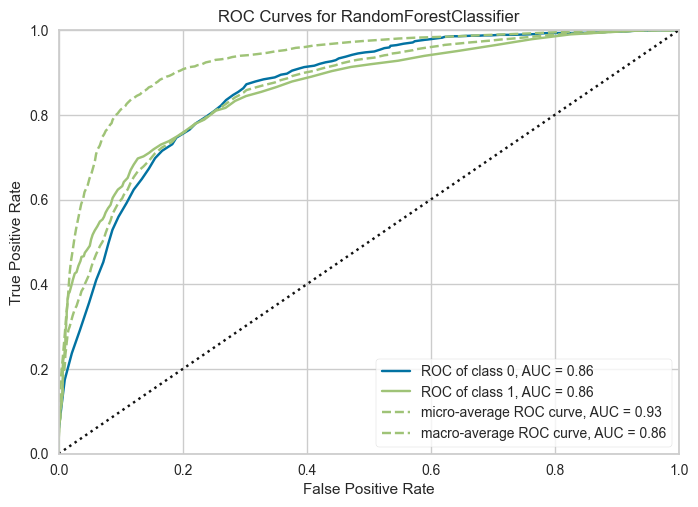

In [15]:
plot_model(estimator = rf, plot = 'auc')

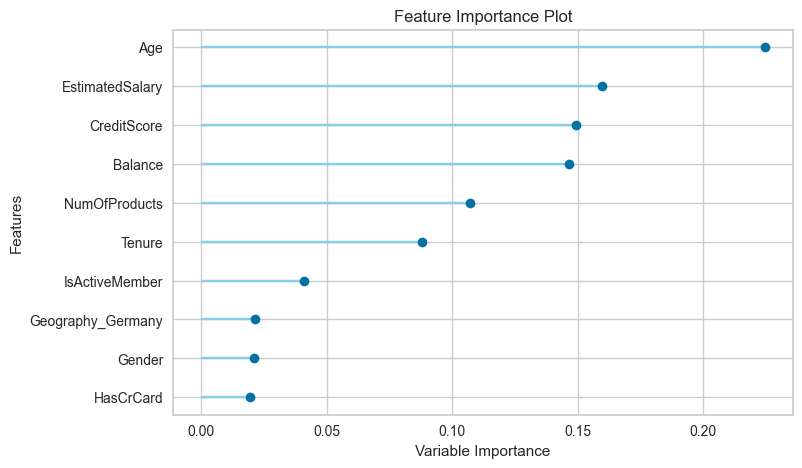

In [16]:
plot_model(estimator = rf, plot = 'feature')

In [17]:
gbc = create_model('gbc')     
lgm  = create_model('lightgbm')          
blend = blend_models(estimator_list=[rf,lgm,gbc])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8429,0.0000,0.3803,0.7105,0.4954,0.4123,0.4406
1,0.8643,0.0000,0.4296,0.8133,0.5622,0.4908,0.5259
2,0.8543,0.0000,0.4789,0.7083,0.5714,0.4876,0.5011
3,0.8643,0.0000,0.4437,0.7975,0.5701,0.4972,0.5274
4,0.8557,0.0000,0.4406,0.7500,0.5551,0.4758,0.4998
5,0.8657,0.0000,0.4685,0.7882,0.5877,0.5136,0.5385
6,0.8786,0.0000,0.5455,0.7959,0.6473,0.5770,0.5921
7,0.8671,0.0000,0.5175,0.7551,0.6141,0.5372,0.5512
8,0.8486,0.0000,0.3566,0.7846,0.4904,0.4158,0.4605


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8386,0.0000,0.4085,0.6667,0.5066,0.4166,0.4345
1,0.8643,0.0000,0.4437,0.7975,0.5701,0.4972,0.5274
2,0.8557,0.0000,0.4859,0.7113,0.5774,0.4941,0.5072
3,0.8657,0.0000,0.4648,0.7857,0.5841,0.5102,0.5352
4,0.8600,0.0000,0.4825,0.7419,0.5847,0.5051,0.5220
5,0.8571,0.0000,0.4685,0.7363,0.5726,0.4919,0.5100
6,0.8600,0.0000,0.4965,0.7320,0.5917,0.5109,0.5249
7,0.8714,0.0000,0.5664,0.7431,0.6429,0.5662,0.5740
8,0.8471,0.0000,0.4196,0.7143,0.5286,0.4447,0.4671


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8443,0.0000,0.3803,0.7200,0.4977,0.4158,0.4455
1,0.8657,0.0000,0.4225,0.8333,0.5607,0.4913,0.5309
2,0.8586,0.0000,0.4718,0.7363,0.5751,0.4951,0.5128
3,0.8700,0.0000,0.4507,0.8312,0.5845,0.5153,0.5493
4,0.8643,0.0000,0.4685,0.7791,0.5852,0.5100,0.5335
5,0.8686,0.0000,0.4825,0.7931,0.6000,0.5269,0.5502
6,0.8714,0.0000,0.5175,0.7789,0.6218,0.5482,0.5648
7,0.8743,0.0000,0.5455,0.7723,0.6393,0.5659,0.5785
8,0.8557,0.0000,0.3916,0.8000,0.5258,0.4523,0.4925


### **Accuracy Score** **Blending Model**



| Model | Accuracy Score | 
| --- | --- | 
| blending Top 3 models | **0**.**8652**  |

### **Confusion Matrix**

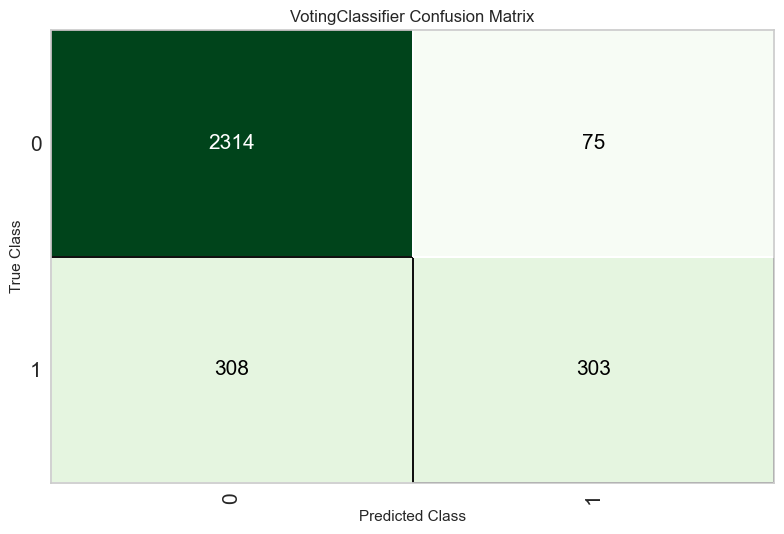

In [18]:
plot_model(estimator = blend, plot = 'confusion_matrix')

### **Evaluate Blend Model**

In [19]:
evaluate_model(blend)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### **Make** **Prediction**

In [20]:
pred = predict_model(blend, data = data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9102,0.9584,0.6235,0.9065,0.7388,0.6868,0.7044


In [21]:
pred

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,prediction_label,prediction_score
0,619,France,Female,42,2,0.000000,1,1,1,101348.882812,1,0,0.7367
1,608,Spain,Female,41,1,83807.859375,1,0,1,112542.578125,0,0,0.8744
2,502,France,Female,42,8,159660.796875,3,1,0,113931.570312,1,1,0.9486
3,699,France,Female,39,1,0.000000,2,0,0,93826.632812,0,0,0.9458
4,850,Spain,Female,43,2,125510.820312,1,1,1,79084.101562,0,0,0.8949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000000,2,1,0,96270.640625,0,0,0.9799
9996,516,France,Male,35,10,57369.609375,1,1,1,101699.773438,0,0,0.9250
9997,709,France,Female,36,7,0.000000,1,0,1,42085.578125,1,0,0.5833
9998,772,Germany,Male,42,3,75075.312500,2,1,0,92888.523438,1,0,0.8858


### **Tuned Blend Model**

In [22]:
tuned_blend = tune_model(blend)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8429,0.0000,0.3732,0.7162,0.4907,0.4085,0.4389
1,0.8643,0.0000,0.4155,0.8310,0.5540,0.4842,0.5248
2,0.8643,0.0000,0.4859,0.7582,0.5923,0.5155,0.5339
3,0.8671,0.0000,0.4437,0.8182,0.5753,0.5047,0.5380
4,0.8686,0.0000,0.4685,0.8072,0.5929,0.5211,0.5485
5,0.8671,0.0000,0.4755,0.7907,0.5939,0.5203,0.5443
6,0.8714,0.0000,0.5175,0.7789,0.6218,0.5482,0.5648
7,0.8800,0.0000,0.5455,0.8041,0.6500,0.5808,0.5967
8,0.8529,0.0000,0.3776,0.7941,0.5118,0.4378,0.4799


Fitting 10 folds for each of 10 candidates, totalling 100 fits


### **Best Accuracy Score!**

| Model | Accuracy Score | 
| --- | --- | 
| Tuned blending Top 3 models | **0**.**8671**  |

### **Evaluate Tuned Model And Make Prediction**

In [23]:
evaluate_model(tuned_blend) 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [24]:
pred_1 = predict_model(tuned_blend, data = data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9294,0.9671,0.7069,0.9296,0.8031,0.7611,0.7717


In [25]:
pred_1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,prediction_label,prediction_score
0,619,France,Female,42,2,0.000000,1,1,1,101348.882812,1,0,0.7489
1,608,Spain,Female,41,1,83807.859375,1,0,1,112542.578125,0,0,0.8761
2,502,France,Female,42,8,159660.796875,3,1,0,113931.570312,1,1,0.9385
3,699,France,Female,39,1,0.000000,2,0,0,93826.632812,0,0,0.9468
4,850,Spain,Female,43,2,125510.820312,1,1,1,79084.101562,0,0,0.8895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000000,2,1,0,96270.640625,0,0,0.9828
9996,516,France,Male,35,10,57369.609375,1,1,1,101699.773438,0,0,0.9320
9997,709,France,Female,36,7,0.000000,1,0,1,42085.578125,1,0,0.5023
9998,772,Germany,Male,42,3,75075.312500,2,1,0,92888.523438,1,0,0.8499


### **Save And Load Best Model**

In [26]:
save_model(tuned_blend, model_name='Navid-Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['CreditScore', 'Age', 'Tenure',
                                              'Balance', 'NumOfProducts',
                                              'HasCrCard', 'IsActiveMember',
                                              'EstimatedSalary'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('ca...
                                                        

In [27]:
NavidModel = load_model('Navid-Model')

Transformation Pipeline and Model Successfully Loaded
